<a href="https://colab.research.google.com/github/IC-UFAL-IADD/IADD/blob/codebasics/%5B2022%5D_DICOM_PRATICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#################################################
### ** Created by Marcelo Oliveira on 24/06/2021. **
### **Disciplina de Fundametos de IA aplicados ao Diagnóstico de Doenças.**
### ** Copyright (c)2020 Instituto de Computação **
### ** Universidade Federal de Alagoas - UFAL. All rights reserved.**
#################################################

References:

1.   https://asvcode.github.io/MedicalImaging/medical_imaging/dicom/fastai/2020/04/28/Medical-Imaging-Using-Fastai.html
2.   https://towardsdatascience.com/understanding-dicoms-835cd2e57d0b
* https://www.kaggle.com/jhoward/
3.   https://www.kaggle.com/jhoward/don-t-see-like-a-radiologist-fastai

4. https://www.kaggle.com/jhoward/from-prototyping-to-submission-fastai


### Requerimentos: pydicom, scikit-image, kornia, fastai 


*   pip install pydicom
*   pip install scikit-image
*   pip install kornia
*   pip install git+https://github.com/fastai/fastai.git










In [ ]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 26.6 MB/s 


In [ ]:
pip install scikit-image

In [ ]:
pip install kornia

In [ ]:
pip install git+https://github.com/fastai/fastai.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Imports 👨‍💻

In [ ]:
import fastai
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
from fastai.data.all import *
from fastai.vision.models import *

import pydicom,kornia,skimage

import matplotlib.pyplot as plt
import seaborn as sns


⭐ Em nosso exemplo vamos usar a base do  SIIM-ACR Pneumothorax Segmentation dataset com (250 arquivos DICOM files - 30MB)
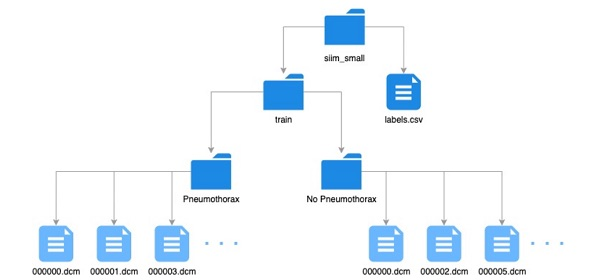

In [ ]:
#Load the Data
pneumothorax_source = untar_data(URLs.SIIM_SMALL)

# Working with dicom files ⚕

## Loading the scans ■■■■■■■■■■■□□□

**Função get_dicom_files**
Carrega de maneira recursiva imagens .dcm a partir de um folder(diretório);

In [ ]:
items = get_dicom_files(pneumothorax_source, recurse=True, folders='train')
print("O numero de exames é..:", len(items))
print("Path Imagens do Paciente 240..:",items[240])

O numero de exames é..: 250
Path Imagens do Paciente 240..: /root/.fastai/data/siim_small/train/No Pneumothorax/000123.dcm


# Leitura do arquivo DCM
⭐ Pydicom converte o DICOM numa estrutura pythonic para facilitar a sua manipulação

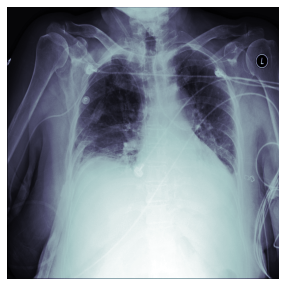

In [ ]:
dimg = pydicom.dcmread(items[100])
dimg.show()

⭐ Pydicom lê os pixels da imagem como **raw bytes** por padrão (PixelData). 





---


# Cabeçalho DICOM ⚕

In [ ]:
dimg
#(0028, 0100) Bits Allocated - Tag que informa quantos bits/pixel (níveis de cinza) temos na imagem

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.11919.1517875236.467047
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.11919.1517875236.467047
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

---
# Carregando os Pixels da Imagem DICOM ⚕

In [ ]:
dimg.PixelData[:100]

b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00\xe0\xf8\xee\x01\x00\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xc0\x00\x0b\x08\x04\x00\x04\x00\x01\x01\x11\x00'

⭐ Ao invés de tentar entender o hexa do Raw do DICOM, podemos visualzar melhor os valores dos Pixels usando um array contendo os dados de cada pixel:
dimg.pixel_array irá retornar um numpy.ndarray

In [ ]:
dimg.pixel_array, dimg.pixel_array.shape

(array([[ 0,  1,  4, ...,  4,  4,  4],
        [ 0,  2,  5, ...,  6,  6,  6],
        [ 1,  3,  6, ...,  6,  6,  6],
        ...,
        [ 0,  3,  5, ..., 14, 15, 15],
        [ 2,  3,  5, ..., 14, 14, 14],
        [ 0,  1,  1, ...,  0,  0,  0]], dtype=uint8), (1024, 1024))

⭐ Transformando o array em Tensor (padrão do Pytorch e facilitar o processamento em GPU quando usamos dados multidimensionais)

In [ ]:
ten_img = TensorDicom(dimg.pixel_array)
ten_img

TensorDicom([[ 0,  1,  4,  ...,  4,  4,  4],
        [ 0,  2,  5,  ...,  6,  6,  6],
        [ 1,  3,  6,  ...,  6,  6,  6],
        ...,
        [ 0,  3,  5,  ..., 14, 15, 15],
        [ 2,  3,  5,  ..., 14, 14, 14],
        [ 0,  1,  1,  ...,  0,  0,  0]], dtype=torch.uint8)

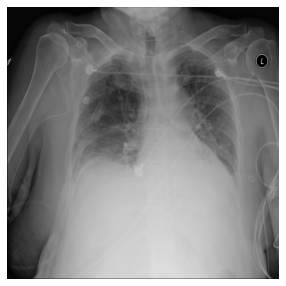

In [ ]:
ten_img.show()

TensorDICOM possui uma função para ajustar o brilho e contraste para "osso"

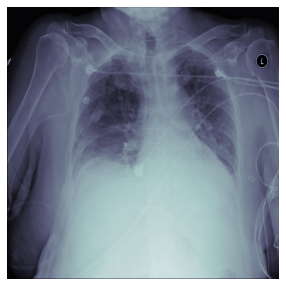

In [ ]:
ten_img.show(cmap=plt.cm.bone)

Que tal um "Rainbow Colormap" ?

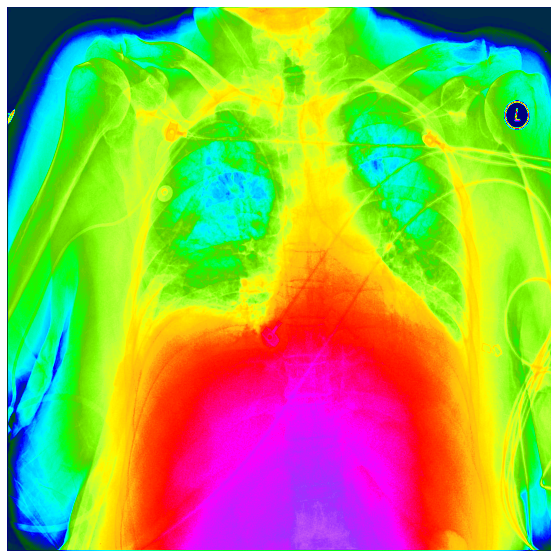

In [ ]:
ten_img.show(cmap=plt.cm.gist_ncar, figsize=(10,10))



---


# Janelamento (Windowing) ⚕

### Entendendo as Densidades dos Tecidos

Vimos que os valores dos pixels das imagens de CT variam a depender da Janela e Nível selecionados. 

Na imagem abaixo lemos um arquivo DICOM (raw), sem tratamento. 

In [ ]:
dicomImgLocal = Path('/content/drive/My Drive/DataSets/CT_aulaDICOM/')
dicomItems = get_dicom_files(dicomImgLocal) 
dicom16bits = pydicom.dcmread(dicomItems[3])

Atenção: as imagens armazenadas no DICOM podem variar a depender do equipamento, ex.:
*   Pixels podem ser amazenados como float, signed e unsigned integers;
*   Ordem dos pixels pode ser invertida (little endian ou big endian);


In [ ]:
dicom16bits

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.1.111.2724.1506707662.14697
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.360.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'IIS_354'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0012) Instance Creation Date              DA: '20170929'
(0008, 0013) Instance Creation Time              TM: '145422'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113704.1.111.2724.1506707662.14

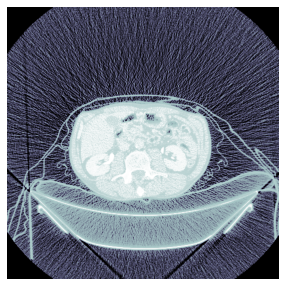

In [ ]:
dicom16bits.show()

# Vamos analisar o Histograma da Imagem de CT 🎯

Text(0.5, 1.0, 'Raw pixel array distribution')

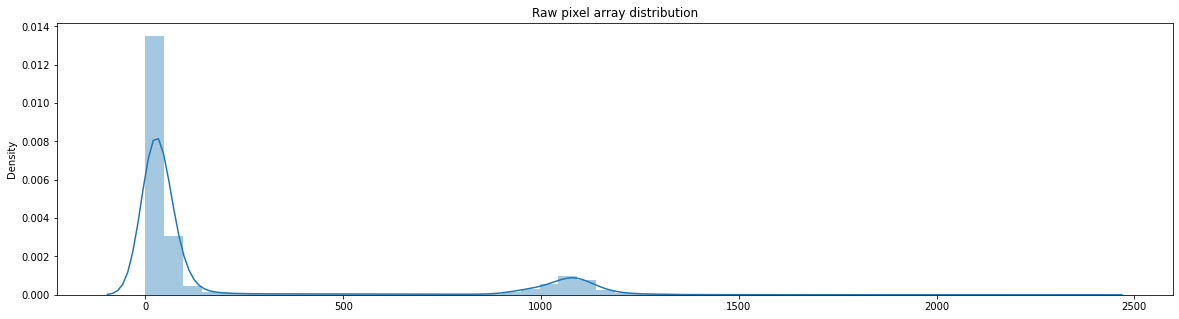

In [ ]:
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1,1,figsize=(20,5))
image = dicom16bits.pixels #_array.flatten()
sns.distplot(image.flatten());
ax.set_title("Raw pixel array distribution")



---

## O histograma da imagem raw apresenta uma concentração de pixels em torno de 0 e 1000 que não representa a real densidade dos tecidos na imagem. 
 

In [ ]:
print(f'RescaleIntercept: {dicom16bits.RescaleIntercept:1f}\nRescaleSlope: {dicom16bits.RescaleSlope:1f}')

RescaleIntercept: -1024.000000
RescaleSlope: 1.000000


In [ ]:
#tensor_dicom = TensorDicom(dicom16bits.pixel_array) #convert into tensor
#print(f'RescaleIntercept: {dicom16bits.RescaleIntercept:1f}\nRescaleSlope: {dicom16bits.RescaleSlope:1f}\nMax pixel: '
#      f'{tensor_dicom.max()}\nMin pixel: {tensor_dicom.min()}\nShape: {tensor_dicom.shape}')

## Usamos as TAGS de **Rescale Intercept** e **Rescale Slope** para realizar o Window e Level das imagens de CT ✅ 

# rescaled pixel = (pixel * RescaleSlope) + RescaleIntercept

**(0028, 1052) Rescale Intercept                   DS: '-1024.0'**

**(0028, 1053) Rescale Slope                       DS: '1.0'**

**Rescaled_pixel** usa estes valores para ajustar a escala da imagem para representar corretamente as densidades dos tecidos. 

Ref.: https://www.kitware.com/dicom-rescale-intercept-rescale-slope-and-itk/

In [ ]:
image = dicom16bits.pixels #pixelf_flatten
rescaled_image = (image * dicom16bits.RescaleSlope) + dicom16bits.RescaleIntercept

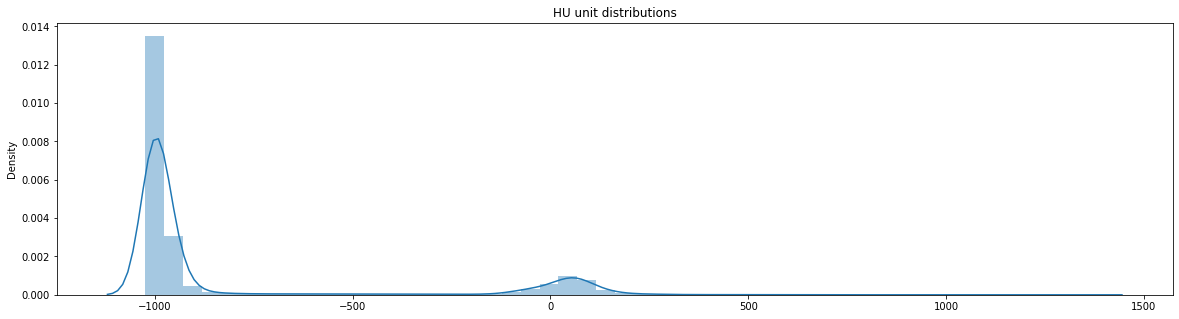

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.distplot(rescaled_image.flatten())
ax.set_title("HU unit distributions");

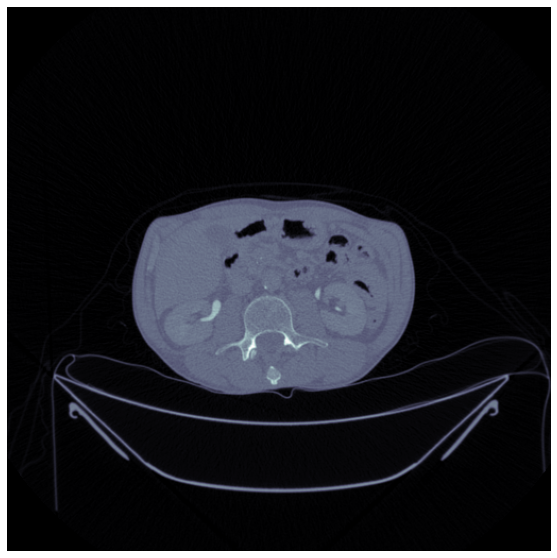

In [ ]:
#pixel = dicom16bits.pixels
#rescale_pixel = (pixel * dicom16bits.RescaleSlope) + dicom16bits.RescaleIntercept)
show_image(rescaled_image, cmap='bone', figsize=(10,10));

# Windowing

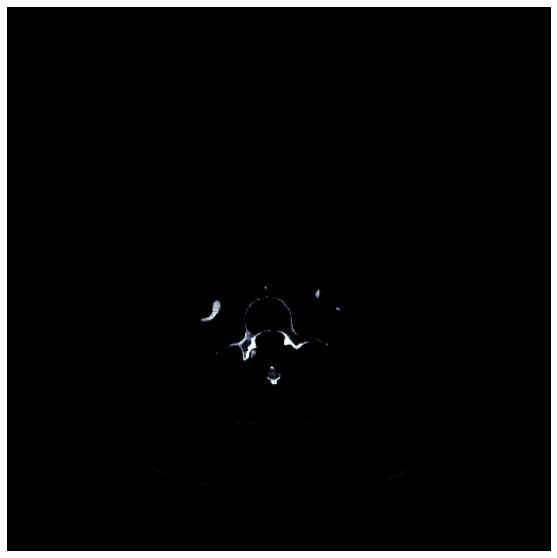

In [ ]:
resc2 = rescaled_image.windowed(l=500, w=500)
show_image(resc2, cmap='bone', figsize=(10,10));

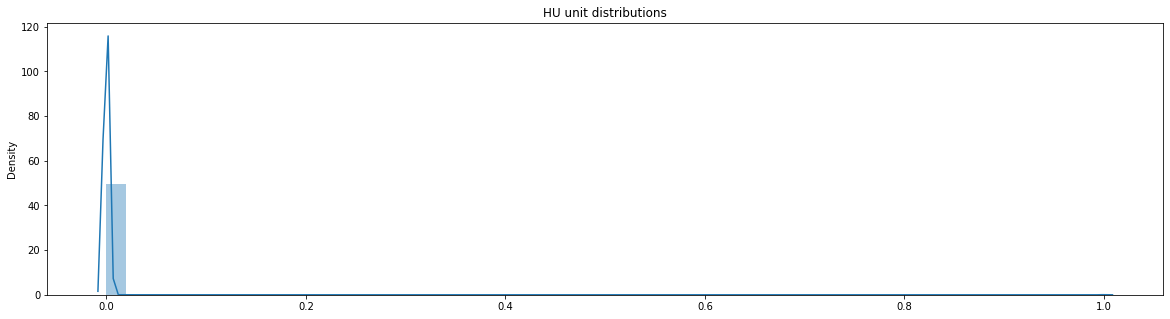

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.distplot(resc2.flatten())
ax.set_title("HU unit distributions");

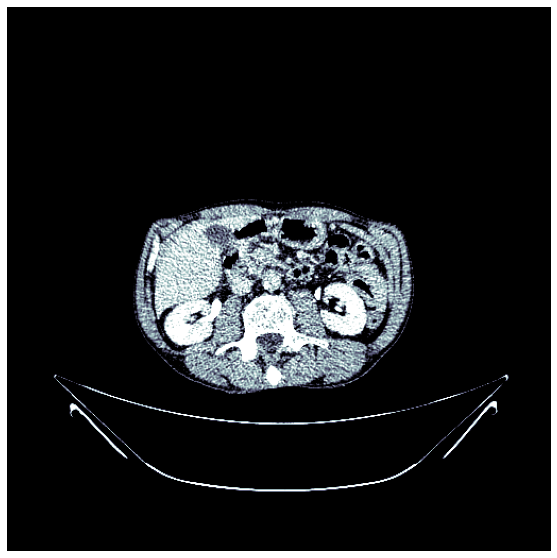

In [ ]:
resc3 = rescaled_image.windowed(l=30, w=150)
show_image(resc3, cmap='bone', figsize=(10,10));

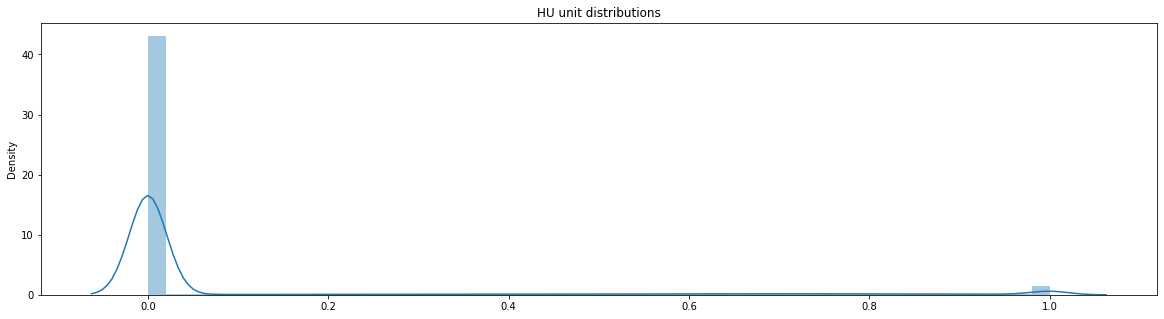

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.distplot(resc3.flatten())
ax.set_title("HU unit distributions");

Atenção ao valores normalizados pela função .windowed

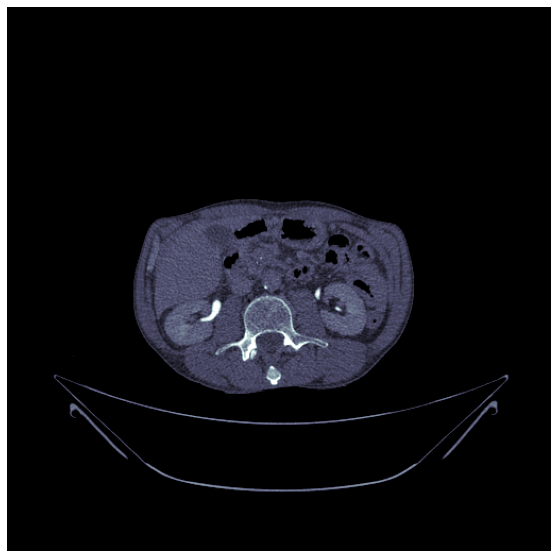

In [ ]:
resc4 = rescaled_image.windowed(l=200, w=800)
show_image(resc4, cmap='bone', figsize=(10,10));

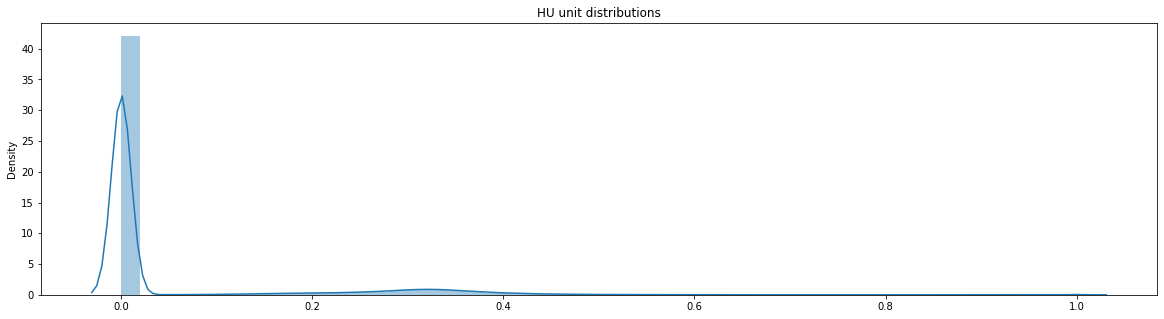

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.distplot(resc4.flatten())
ax.set_title("HU unit distributions");

# FastAI Tabela de Janelamento 
Window/Level (dicom_windows)
* brain=(80,40),
* subdural=(254,100),
* stroke=(8,32),
* brain_bone=(2800,600),
* brain_soft=(375,40),
* lungs=(1500,-600),
* mediastinum=(350,50),
* abdomen_soft=(400,50),
* liver=(150,30),
* spine_soft=(250,50),
* spine_bone=(1800,400)












In [ ]:
dicom_windows = types.SimpleNamespace(
    test_window=(1800,400),
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400)
)


# Exemplo de Janelamento arbitrário

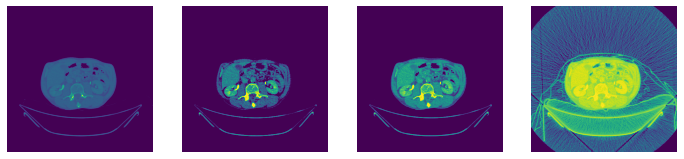

In [ ]:
show_images(dicom16bits.to_nchan([dicom_windows.test_window,dicom_windows.subdural,dicom_windows.abdomen_soft]))

Converter o DICOM em Tensors para manipulá-lo

TensorDicom([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

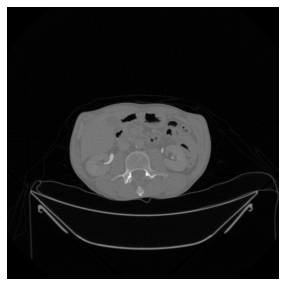

In [ ]:
tensor_dicom = TensorDicom(dicom16bits.pixel_array)
tensor_dicom.show()
tensor_dicom

Visualizar uma ROI (region of interest)

In [ ]:
portion = tensor(tensor_dicom)[150:250,150:250]
portion.shape

torch.Size([100, 100])

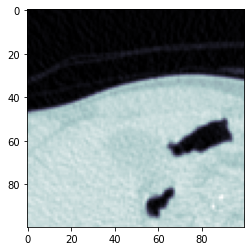

In [ ]:
plt.imshow(portion, cmap=plt.cm.bone)

# Salvar um Tensor em .jpg com um determinada Janela 📂

In [ ]:
pathJPG = Path('/content/drive/My Drive/DataSets/AulaDICOM_JPGs/')

In [ ]:
dicom16bits.save_jpg(path=(pathJPG/f'/01dicom.jpg'), wins=[dicom_windows.lungs, dicom_windows.lungs])


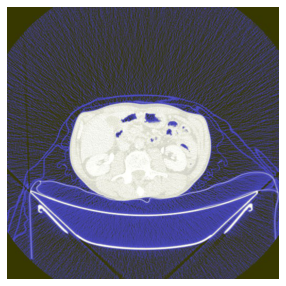

In [ ]:
show_image(Image.open(pathJPG/f'/01dicom.jpg'))

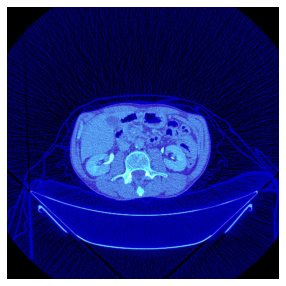

In [ ]:
dicom16bits.save_jpg(path=(pathJPG/f'/02dicom.jpg'), wins=[dicom_windows.test_window, dicom_windows.abdomen_soft])
show_image(Image.open(pathJPG/f'/02dicom.jpg'))



---


## NIFTI (Neuroimaging Informatics Technology) 📂
* https://docs.safe.com/fme/html/FME_Desktop_Documentation/FME_ReadersWriters/nifti/nifti.htm 
* https://nipy.org/nibabel/nifti_images.html
* https://pycad.medium.com/what-is-the-difference-between-dicom-and-nifti-images-7b76a94a9631

In [ ]:
!pip install dicom2nifti 

In [ ]:
import dicom2nifti

pathDicomSeries = '/content/drive/My Drive/DataSets/CT_aulaDICOM/'
path2SaveNifti = '/content/drive/My Drive/DataSets/AulaDICOM_NII/'

dicom2nifti.convert_directory(pathDicomSeries, path2SaveNifti )

In [ ]:
import nibabel as nib
from nibabel.testing import data_path
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
test_load = nib.load(f'{path2SaveNifti}2_contraste_venoso.nii.gz')
test_load.shape

(512, 512, 5)

In [ ]:
print(test_load.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512   5   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9765625  0.9765625  1.         1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 252.0
qoffset_y       : -420.02344
qoffset_z   

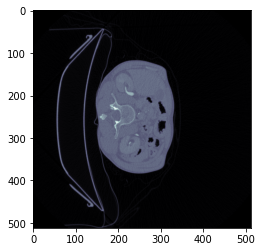

In [ ]:
pix_load = test_load.get_fdata()
niiExam = pix_load[:,:,0]
plt.imshow(niiExam, cmap=plt.cm.bone)


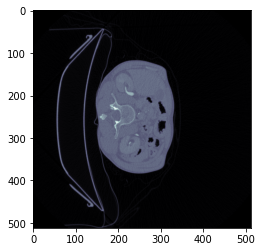

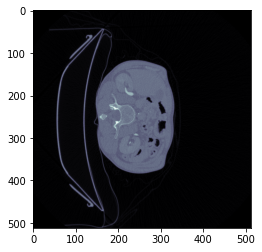

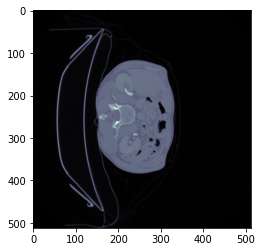

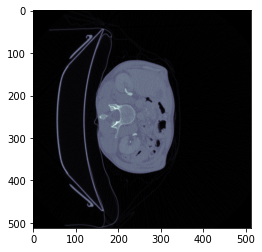

In [ ]:
for i in range(4):
    niiExam = pix_load[:,:,i]
    plt.imshow(niiExam, cmap=plt.cm.bone)
    plt.show()
